<font size='5'>Abs(return) auto-correlation decay </font>

This notebook is an experiment in finding auto-correlation over an intraday time horizon. The absolute values of log returns show that auto-correlation decays after a certain number of time steps. 

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm

Create the subset of assets.

In [5]:
ohlc = pd.read_csv('./data/TLT_sample.csv')

closes = np.log(ohlc['marketClose']).diff().apply(abs)

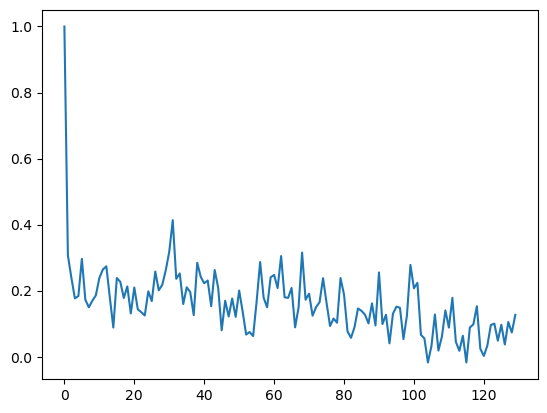

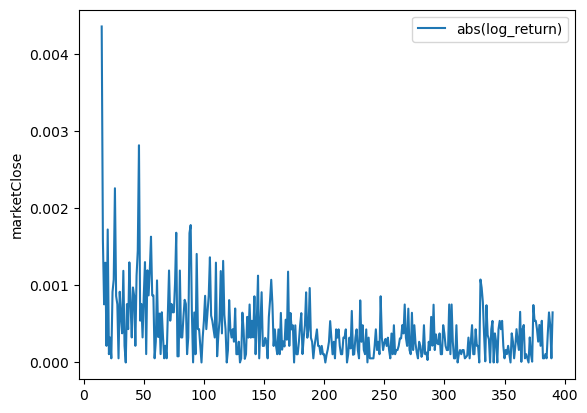

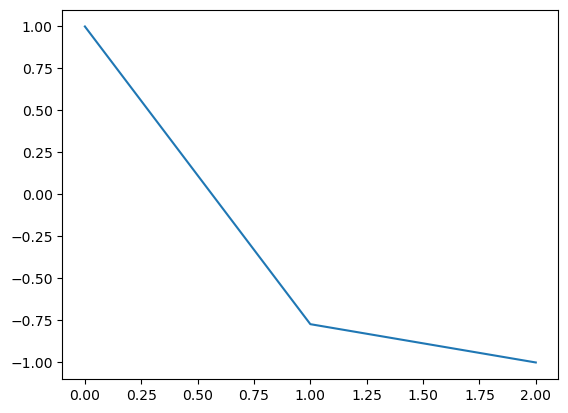

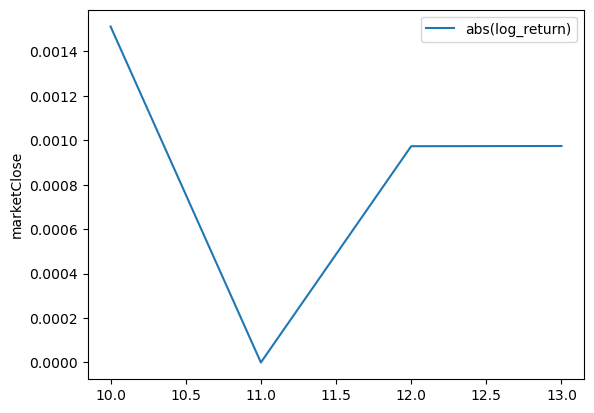

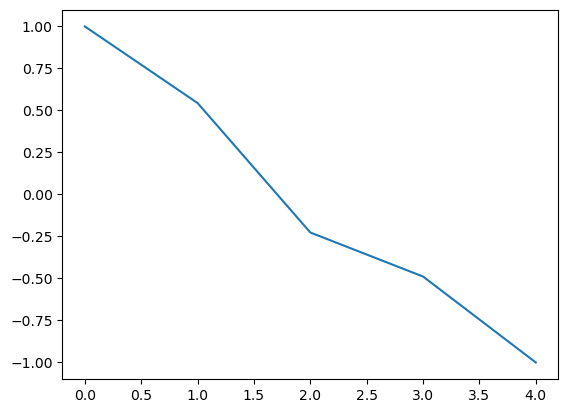

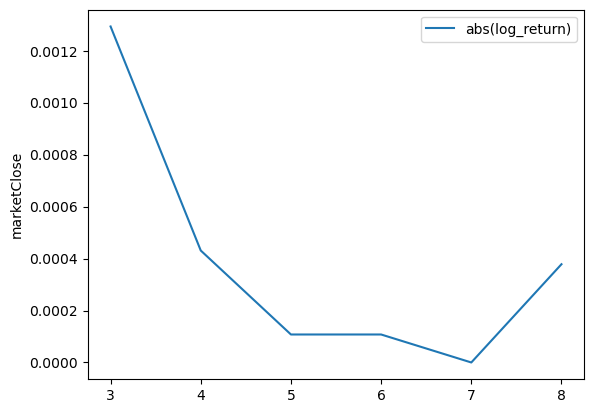

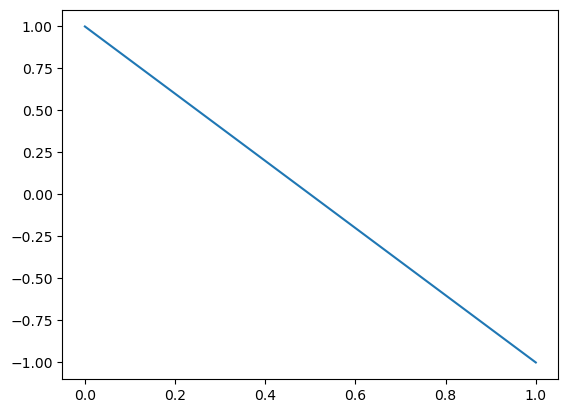

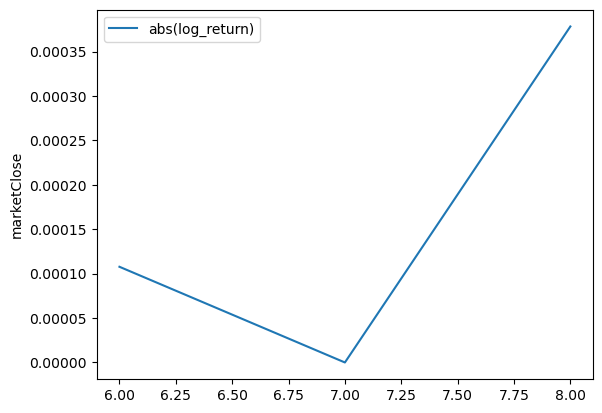

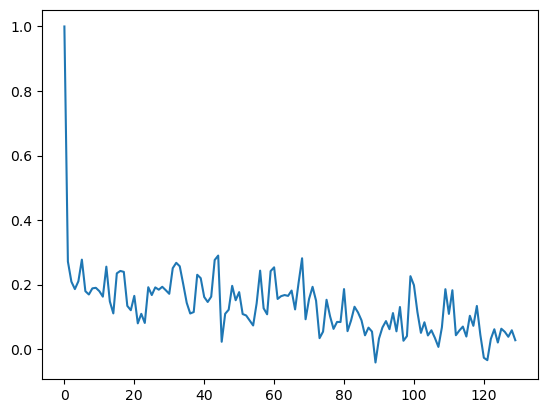

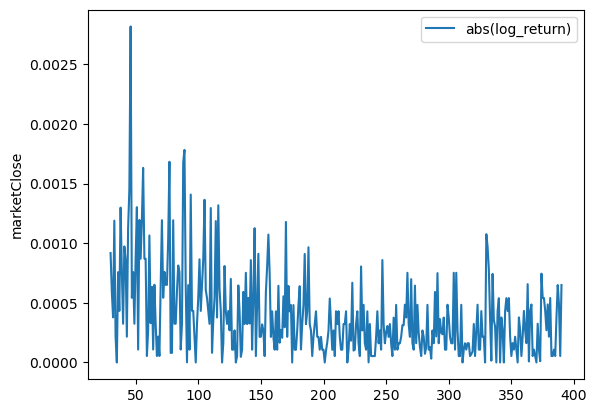

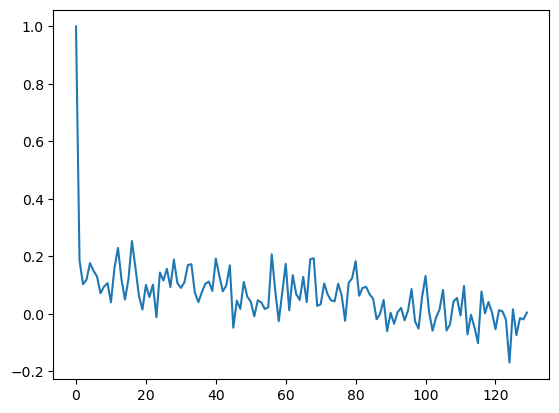

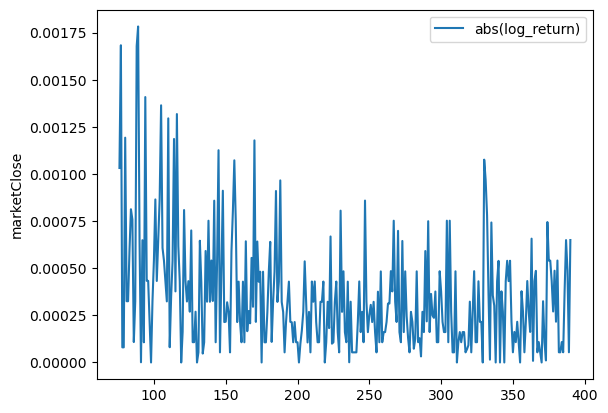

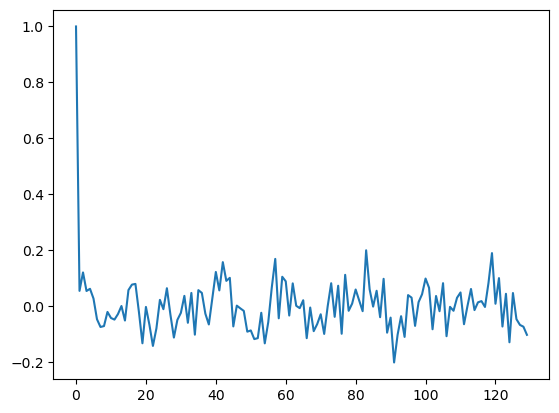

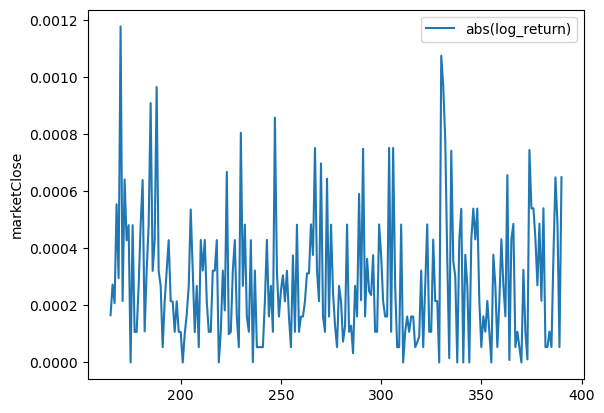

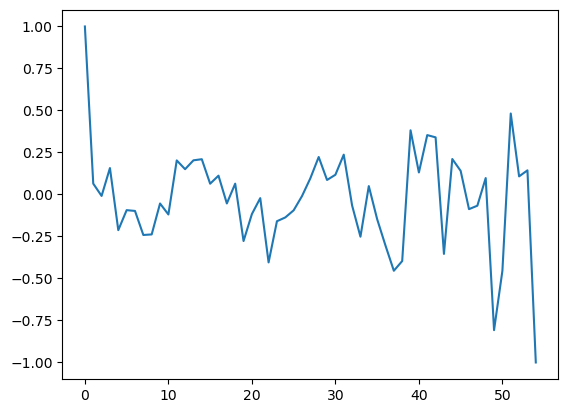

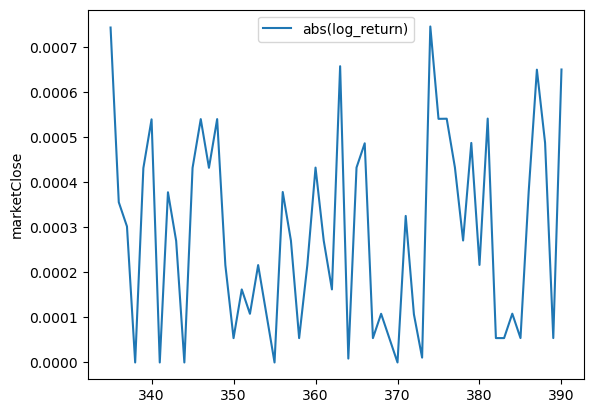

In [6]:

decay_func = lambda S, _range: [S.autocorr(lag=N) for N in _range]

def get_decay(df):
    # Check if the dataframe is empty
    if df.empty or len(df) <= 1: 
        return

    # Find the largest value in the data
    max_value = df.idxmax()

    # Split the data into two sets: one before and one after the largest value
    df_before = df[:max_value-1]
    df_after = df[max_value:]

    if len(df_after) > 1 and len(df_before) > 1:
        
        # Show Decay
        sns.lineplot(data=decay_func(df_after, range(0,130)))
        plt.show()

        # Show Line 
        sns.lineplot(data=df_after, label='abs(log_return)')
        plt.show()

        # Recursion 
        get_decay(df_before)
        get_decay(df_after)

get_decay(closes)